In [3]:
import numpy as np
from matplotlib import pyplot as plt

$\mathbf{\text{Задача 1}}$

In [7]:
def p_norm(x, p):
    n = len(x)
    ans = (sum(x ** p)) ** (1 / p)
    return ans

# для произвольного p задача не имеет хорошего аналитического решения.
# Для определенных p из списка на https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html можно 
# использовать функцию np.linalg.norm(A, ord=p)


1.2599210498948732

$\mathbf{\text{Задача 2}}$

In [90]:
# Хотя норма Фробениуса и есть в функции p.linalg.norm(A, ord=p), напишем ее самостоятельно, использую SVD разложение. 
# Вообще говоря, быстрее данная норма считается прямым вычислением как корень из суммы квадратов элементов матрицы
def frobenius_norm(A):
    u, s, vh = np.linalg.svd(A)
    return np.sum(s ** 2) ** 0.5

In [91]:
A = np.array([[1, 1], [-1, 1]])
print(frobenius_norm(A), np.linalg.norm(A, ord='fro'))

2.0 2.0


 Проверим неравенства $\frac{1}{\sqrt{n}}\|\mathbf{A}\|_{F} \leq\|\mathbf{A}\|_{2} \leq\|\mathbf{A}\|_{F}$ статистически

In [11]:
correct_cases = 0
N = 1000
for i in range(N):
    n = np.random.randint(2, 10)
    A = np.random.uniform(-5, 5, size=[n, n])
    if 1 / n**0.5 * frobenius_norm(A) <= np.linalg.norm(A, ord=2) <= frobenius_norm(A):
        correct_cases += 1
print('Total correct cases: ' + str(correct_cases) + ' out of ' + str(N))

Total correct cases: 1000 out of 1000


Найдем среднее значение отношения спектральной нормы к норме Фробениуса и исследуем зависимость этой величины от n

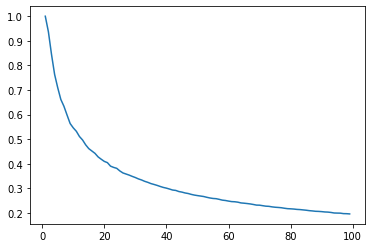

In [18]:
results = []
N = 100
N_ITER = 100
for i in range(1, N):
    res = 0.0
    for j in range(N_ITER):
        A = np.random.uniform(-5, 5, size=[i, i])
        res += np.linalg.norm(A, ord=2) / frobenius_norm(A)
    res /= N_ITER
    results.append(res)
plt.plot(np.array(range(1, N)), results)
    


$\mathbf{\text{Задача 3}}$

In [28]:
def generate_sample(A, m):
    n = m.shape[0]
    L = np.linalg.cholesky(A)
    y = np.random.normal(size=n)
    m.reshape(n, 1)
    y.reshape(n, 1)
    return m + L@y

In [38]:
A = np.array([[1, 0.5], [0.5, 1]])
m = np.array([1, 1])
x = []
y = []
for i in range(100):
    a, b = generate_sample(A, m)
    x.append(a)
    y.append(b)
print(np.cov([x, y]))


[[0.96445996 0.57270653]
 [0.57270653 1.06848691]]


$\mathbf{\text{Задача 4}}$

In [60]:
def find_move(X1, X2):
    X1 = np.array(X1)
    X2 = np.array(X2)
    n = X1.shape[0]
    x1 = (np.mean(X1, axis=0)).reshape(2, 1)
    x2 = (np.mean(X2, axis=0)).reshape(2, 1)
    centredX1 = X1 - np.ones(n).reshape(n, 1) @ x1.T
    centredX2 = X2 - np.ones(n).reshape(n, 1) @ x2.T
    u, s, vh = np.linalg.svd(X1.T@X2)
    R = u@vh
    mu = x2 - R.T@x1
    return R, mu

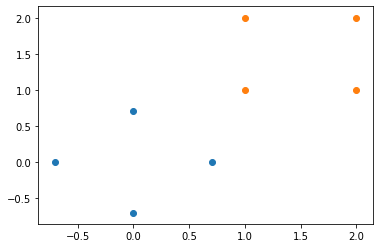

In [75]:
X1 = np.array([
    [np.sqrt(2) / 2, 0],
    [-np.sqrt(2) / 2, 0],
    [0 ,np.sqrt(2) / 2],
    [0, -np.sqrt(2) / 2]
])
X2 = np.array([
    [1, 1],
    [1, 2],
    [2, 1],
    [2, 2]
])
plt.scatter(X1.T[0], X1.T[1])
plt.scatter(X2.T[0], X2.T[1])

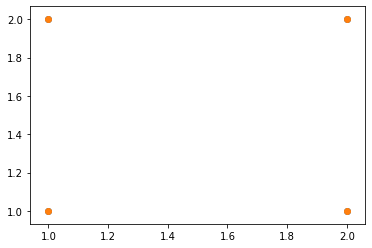

In [76]:
R, mu = find_move(X1, X2)
n = X1.shape[0]
X1new = (mu@np.ones(n).reshape(1, n) + (R@X1.T)).T
plt.scatter(X1new.T[0], X1new.T[1])
plt.scatter(X2.T[0], X2.T[1])

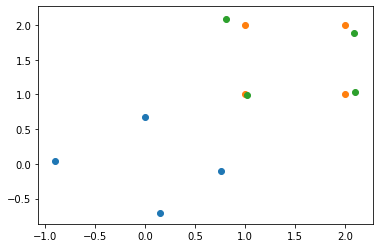

In [80]:
X1 = np.array([
    [np.sqrt(2) / 2 + 0.05, 0- 0.1],
    [-np.sqrt(2) / 2 - 0.2, 0 + 0.04],
    [0 ,np.sqrt(2) / 2 - 0.03],
    [0 + 0.15, -np.sqrt(2) / 2]
])
X2 = np.array([
    [1, 1],
    [1, 2],
    [2, 1],
    [2, 2]
])
plt.scatter(X1.T[0], X1.T[1])
plt.scatter(X2.T[0], X2.T[1])
R, mu = find_move(X1, X2)
n = X1.shape[0]
X1new = (mu@np.ones(n).reshape(1, n) + (R@X1.T)).T
plt.scatter(X1new.T[0], X1new.T[1])

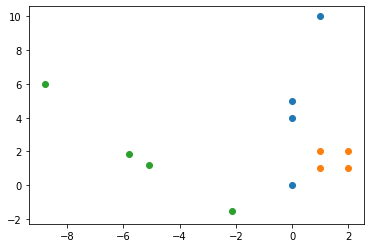

In [82]:
X1 = np.array([
    [0, 4],
    [0, 5],
    [1, 10],
    [0, 0]
])
X2 = np.array([
    [1, 1],
    [1, 2],
    [2, 1],
    [2, 2]
])
plt.scatter(X1.T[0], X1.T[1])
plt.scatter(X2.T[0], X2.T[1])
R, mu = find_move(X1, X2)
n = X1.shape[0]
X1new = (mu@np.ones(n).reshape(1, n) + (R@X1.T)).T
plt.scatter(X1new.T[0], X1new.T[1])